In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from scipy.stats import poisson

## Generacion Envios

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math

from scipy.stats import poisson
from scipy.stats import poisson
from scipy.stats import chisquare


from ortools.linear_solver import pywraplp

from scipy.spatial.distance import cdist

from tsp_solver.util import path_cost
import fast_tsp

import time

In [3]:
cap = 20

In [4]:
def montecarlo(df, n):  
    resultados = []
    for _ in range(n):
        num = np.random.rand()
        for j in range(len(df)):
            if df[j][3] <= num < df[j][4]:
                resultados.append(j)
            
    return resultados

In [5]:
ds = pd.read_csv('distancias_tiempos2.csv')
ds = ds[['Distance', 'Duration']]

ds['Duration'] = pd.to_datetime(ds['Duration'])
ds['Duration'] = ds['Duration'].dt.strftime('%H:%M')
ds['Duration']=ds['Duration'].astype('string')

def convert_to_seconds(time_str):
    hours, minutes = map(int, time_str.split(':'))
    total_seconds = hours * 3600 + minutes * 60
    return total_seconds

# Apply the conversion function to the DataFrame column
ds['Segundos'] = ds['Duration'].apply(convert_to_seconds)
rangos = np.arange(0,40401,201)
cuadrada = []
for i in range(len(rangos)-1):
    cuadrada.append(list((ds['Segundos'][rangos[i]:rangos[i+1]])))
result_array = np.append(np.array(cuadrada), [(ds['Segundos'][rangos[-1]:])], axis = 0)
result_array.shape

C:\Users\jmanu\AppData\Local\Temp\ipykernel_20408\1857851362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Duration'] = pd.to_datetime(ds['Duration'])


(201, 201)

In [6]:
cuadrada = []
for i in range(len(rangos)-1):
    cuadrada.append(list((ds['Distance'][rangos[i]:rangos[i+1]])))
resulta_array = np.append(np.array(cuadrada), [(ds['Distance'][rangos[-1]:])], axis = 0)
resulta_array

array([[ 0.  , 15.26,  9.77, ..., 11.08,  9.65, 12.54],
       [15.51,  0.  , 21.01, ..., 17.01, 17.9 , 14.33],
       [ 9.01, 19.93,  0.  , ..., 18.61, 17.17, 20.07],
       ...,
       [ 9.9 , 17.47, 18.35, ...,  0.  ,  3.11,  2.25],
       [ 8.35, 16.18, 17.06, ...,  3.2 ,  0.  ,  5.26],
       [11.81, 13.71, 20.48, ...,  2.47,  5.58,  0.  ]])

In [7]:
def remove_first_row_and_column(input_array):
    if input_array.shape[0] <= 1 or input_array.shape[1] <= 1:
        raise ValueError("Input array must have at least 2 rows and 2 columns.")

    new_array = input_array[1:, 1:]
    return new_array

In [8]:
dm = pd.read_csv('lat_lon.csv')

In [9]:
dm = dm.rename(columns={'Latitude (y)': 'LAT', 'Longitude (x)': 'LON'})
coordenadas = [tuple(array) for array in dm.to_numpy()]

In [10]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import folium
import re

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
        '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
        '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
        '#000075', '#808080']*10
sns.set(style="white")

c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\jmanu\miniconda3\envs\JML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


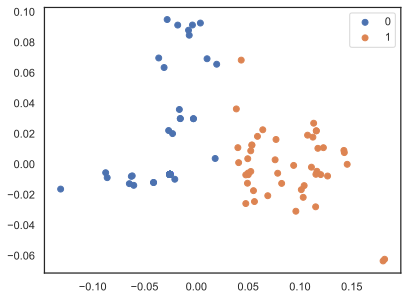

In [11]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(dm[["LON", "LAT"]])
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

dm["CLUSTER"] = label

In [12]:
labels = label

In [13]:
clusters = {}
my_list = np.array(labels)
for i in range(0,2): 
    indices = np.where(my_list == i)[0]
    #indices = np.add(1, indices)
    clusters.update({i:indices})

In [14]:
compras = pd.read_excel('informacion_compra.xlsx')
compras.head(3)

,Producto,Unidades,Factura
0,48443,1,799186
1,42877,1,717106
2,48296,1,468125


In [15]:
facturas = []
productos = []
for _,i in compras.iterrows():
    facturas += [i[2]]*i[1]
for _,i in compras.iterrows():
    productos += [i[0]]*i[1]

compras = pd.DataFrame({
    "Factura": facturas,
    "Producto": productos
})

In [16]:
df = compras.groupby(['Factura']).size().reset_index(name='Frequency').Frequency.value_counts()
df = df.reset_index()
df.columns = ['Pedidos', 'Frecuencia']
df['Frecuencia ln'] = np.log(df['Frecuencia'])
valor_medio = np.sum(df['Pedidos'] * df['Frecuencia ln']) / np.sum(df['Frecuencia ln'])
df['Poisson'] = poisson.pmf(df['Pedidos'], valor_medio)
df['valores_esperados'] = df['Poisson'] * np.sum(df['Frecuencia ln'])
df.head(3)

,Pedidos,Frecuencia,Frecuencia ln,Poisson,valores_esperados
0,1,19235,9.864487,0.011672,0.783311
1,2,3546,8.173575,0.036706,2.463277
2,3,1024,6.931472,0.076953,5.164178


In [17]:
df2 = compras.groupby(['Producto']).size().reset_index(name='Frequency').Frequency.value_counts()
df2 = df2.reset_index()
df2.columns = ['Producto', 'Frecuencia']
df2['Frecuencia ln'] = np.log(df2['Frecuencia'])
valor_medio = np.sum(df2['Producto'] * df2['Frecuencia ln']) / np.sum(df2['Frecuencia ln'])
df2['Poisson'] = poisson.pmf(df2['Producto'], valor_medio)
df2['valores_esperados'] = df2['Poisson'] * np.sum(df2['Frecuencia ln'])
df2.head(3)

,Producto,Frecuencia,Frecuencia ln,Poisson,valores_esperados
0,1,1793,7.491645,1.565792e-11,2.886239e-09
1,2,779,6.658011,2.209339e-10,4.072494e-08
2,3,414,6.025866,2.078257e-09,3.830870e-07


In [18]:
pedidos = df[['Pedidos','Poisson']]
pedidos['Acumulado'] = pedidos.Poisson.cumsum()
pedidos['Inferior'] = [0] + pedidos['Acumulado'].tolist()[:-1]
pedidos['Superior'] = pedidos['Acumulado']
pedidos = pedidos.to_numpy()

C:\Users\jmanu\AppData\Local\Temp\ipykernel_20408\3932492861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos['Acumulado'] = pedidos.Poisson.cumsum()
C:\Users\jmanu\AppData\Local\Temp\ipykernel_20408\3932492861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos['Inferior'] = [0] + pedidos['Acumulado'].tolist()[:-1]


In [19]:
producto = df2[['Producto','Poisson']]
producto['Acumulado'] = producto.Poisson.cumsum()
producto['Inferior'] = [0] + producto['Acumulado'].tolist()[:-1]
producto['Superior'] = producto['Acumulado']
producto = producto.to_numpy()

C:\Users\jmanu\AppData\Local\Temp\ipykernel_20408\3891866760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto['Acumulado'] = producto.Poisson.cumsum()
C:\Users\jmanu\AppData\Local\Temp\ipykernel_20408\3891866760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto['Inferior'] = [0] + producto['Acumulado'].tolist()[:-1]


In [20]:
dp = pd.read_csv('info_productos.csv')
dp.columns = ['Producto', 'Volumen']
nuevo_registro = {"Producto": 0, "Volumen": 0}
dp = pd.concat([pd.DataFrame([nuevo_registro]), dp], ignore_index=True)
VOLU = dp.to_numpy()[:,1]

In [21]:
def monterrey():
    cuadrada = []
    for i in range(len(rangos)-1):
        cuadrada.append(list((ds['Distance'][rangos[i]:rangos[i+1]])))
    resulta_array = np.append(np.array(cuadrada), [(ds['Distance'][rangos[-1]:])], axis = 0)
    return resulta_array

In [22]:
def clusteritos(new_array, random_indexes):
    new_clus = {'0': [], '1': []}
    for value, index in zip(new_array, random_indexes):
        new_clus[str(value)].append(index)
    return new_clus

In [23]:
def generar_pedidos():
    num_pedidos = montecarlo(pedidos,compras.size)
    envios = [np.array(montecarlo(producto, num)) for num in montecarlo(pedidos,200) if num!=0]
    envios_np = envios[:100]
    enviosArreglo = np.array([[-1,-1,-1]])
    for i in range(len(envios)):
        a = np.unique(np.array(envios[i]), return_counts=True)
        enviosArreglo = np.concatenate((enviosArreglo, np.array([np.array([i]*len(a[0])),a[0],a[1]]).T))
    return envios_np

In [24]:
def dimensiones_pedidos(VOLU):
    dimensiones = []
    for pedido in envios_np:
        acumulado = 0
        for i in pedido:
            acumulado += VOLU[i]
        dimensiones.append(round(acumulado,4))
    return dimensiones

In [25]:
def vols_for_clus(new_array, dimensiones):
    vol_por_clus = {0: [], 1: []}
    for value, index in zip(new_array, dimensiones):
        vol_por_clus[int(value)].append(index)
    return vol_por_clus

In [26]:
resulta_array = monterrey()

## Algoritmo GREEDY

In [27]:
def caltiempo(path):
    tiempo = 0
    for i in range(len(path)):
        tiempo += result_array[path[i-1]][path[i]]
    return tiempo
def calVolumen(path, volumen):
    return sum([volumen[i] for i in path])
def delnode(i, matriz):
    matriz[:,[i]] = 100000000000000
    return matriz

In [64]:
def greedy(tiempos, volumen, tiempoLimite, volumenLimite):
    M = 100000000000000
    tiempos[tiempos==0]=M
    inicio = tiempos[0, :].copy()
    matriz = tiempos.copy()
    matriz[:,[0]] = M
    matriz[[0],:] = M
    caminos = []
    camino = [0, inicio.argmin()]
    inicio[inicio.argmin()] = M
    matriz = delnode(camino[-1], matriz)
    while not np.all(matriz==M):
        nodes = matriz[camino[-1]].copy()
        camino.append(nodes.argmin())
        
        if caltiempo(camino)>tiempoLimite or calVolumen(camino, volumen)>volumenLimite:
            del camino[-1]
            print(camino)
            print(caltiempo(camino), calVolumen(camino, volumen))
            caminos.append(camino.copy())
            camino = [0, inicio.argmin()]
            if camino[-1] ==0:
                print("hola")
                print(inicio)
                inicio[inicio.argmin()] = M+9999999
                print(inicio)
                assert()
            else:
                inicio[inicio.argmin()] = M+9999999
            matriz = delnode(camino[-1], matriz)
            
        else:
            matriz = delnode(camino[-1], matriz)
            inicio[camino[-1]] = M
    print(camino)
    print(caltiempo(camino), calVolumen(camino, volumen))
    print(caminos + [camino])
    return(caminos + [camino])

tiempos = np.array([
    [0, 0.4, 1.5, 0.6, 0.1, 1.3, 1.1, 0.5, 1.3, 0.6, 0.5],
    [1.2, 0, 1.5, 1.7, 1.6, 0.7, 0.1, 0.5, 1.5, 1, 1.7],
    [0.5, 0.4, 0, 0.1, 1.1, 1.5, 1.1, 1.1, 1.4, 0.7, 1.1],
    [1.6, 0.2, 1.7, 0, 0.5, 0.7, 1.6, 1.8, 1.2, 1, 1.5],
    [1.3, 0.9, 1.6, 1.1, 0, 0.4, 1.8, 1.3, 1.7, 0.3, 0.1],
    [1.4, 1.1, 0.1, 0.5, 0.8, 0, 0.6, 0.9, 1.9, 1, 1.9],
    [1.4, 1.7, 0.4, 0.4, 0.7, 1.7, 0, 0.6, 0.6, 1.5, 0.3],
    [1.3, 0.9, 1.6, 1.8, 1.4, 1.2, 1.5, 0, 0.4, 0.6, 1.9],
    [1.5, 0.8, 2, 0.8, 0.3, 0.3, 1.9, 1.6, 0, 1.4, 2],
    [0.7, 0.1, 0.6, 0.3, 0.3, 2, 1.4, 0.5, 1.6, 0, 1.7],
    [1.2, 1.9, 0.8, 0.2, 0.8, 1.7, 0.7, 2, 1.6, 1.7, 0]
])
volumen = np.array([0, 10.,  4., 15.,  6.,  1., 13., 11.,  5., 13.,  6.,  5.])
greedy(tiempos, volumen, 2.4, 10)

## Generación de envios

In [54]:
envios_np = generar_pedidos()
dimensiones = dimensiones_pedidos(VOLU)

In [55]:
dimensiones = dimensiones+ dimensiones

## COSA

In [56]:
result_array.shape

(201, 201)

In [57]:
np.array([5,4,1,1]).argmin()

2

In [75]:
import time
inicio = time.time()
lista = greedy(result_array, [0] + dimensiones, 28800, 60)
print([caltiempo(path)/3600 for path in lista])
time.time() - inicio

[0, 69, 25, 47, 28, 88, 123, 64, 157, 92, 188, 177, 167, 172, 196, 199, 187, 194, 142, 146, 198, 150, 195, 166, 176, 190, 141, 153, 154, 139, 117, 162, 182, 189, 184, 158, 161, 160, 183, 143, 144, 50, 136, 26, 97, 5, 1, 41, 103, 129, 19, 60, 54, 135, 55, 61, 70, 75, 85, 101, 106, 8, 91, 37, 126, 66, 115, 52, 124, 65, 81, 133, 36, 49, 134, 31, 62, 80, 79, 11, 74, 72, 180]
21900 59.59539999999999
[0, 90, 17, 67, 130, 59, 98, 30, 9, 51, 93, 118, 40, 110, 3, 2, 4, 87, 109, 128, 105, 16, 131, 125, 38, 95, 100, 152, 13, 82, 197, 34, 147, 116, 29, 68, 84, 107, 12, 44, 132, 20, 32, 114, 22, 127, 6, 63, 15, 149, 48, 42, 14, 10, 111, 104, 24, 83, 35, 57, 102, 46, 112, 56, 120, 7, 99, 96, 58, 108, 119, 43, 73, 39, 78, 45, 121, 86]
26040 59.35459999999997
[0, 18, 27, 137, 77, 122, 168, 151, 155, 173, 175, 145, 192, 169, 191, 186, 53, 164, 179, 178, 140, 138, 170, 148, 193, 163, 200, 171, 185, 181, 174, 159, 156, 76, 94, 23, 113, 165, 89, 33, 71]
27840 31.593200000000003
[0, 21]
6360 1.5162
[[0, 69

0.013478755950927734

In [80]:
(47 * 100000)/(3600*24)

54.398148148148145

In [40]:
l = []
for i in lista:
    for j in i:
        if j in l:
            print(j)
        else:
            l.append(j)
l

0
0
0
0
0
0
0
0
0
0
0


[0,
 69,
 25,
 47,
 28,
 88,
 123,
 64,
 157,
 92,
 188,
 177,
 167,
 172,
 196,
 199,
 187,
 194,
 142,
 146,
 198,
 150,
 90,
 17,
 67,
 130,
 59,
 98,
 30,
 9,
 51,
 93,
 118,
 40,
 110,
 3,
 2,
 4,
 87,
 128,
 109,
 105,
 16,
 131,
 125,
 38,
 95,
 100,
 152,
 86,
 137,
 27,
 18,
 77,
 122,
 168,
 36,
 136,
 26,
 97,
 5,
 1,
 41,
 103,
 129,
 19,
 60,
 54,
 135,
 55,
 121,
 147,
 197,
 82,
 126,
 91,
 37,
 66,
 85,
 75,
 70,
 8,
 101,
 106,
 115,
 173,
 155,
 151,
 117,
 139,
 162,
 182,
 189,
 154,
 141,
 153,
 176,
 190,
 166,
 195,
 171,
 185,
 200,
 163,
 181,
 158,
 184,
 160,
 183,
 116,
 29,
 68,
 84,
 124,
 52,
 65,
 81,
 133,
 49,
 61,
 107,
 12,
 44,
 132,
 20,
 32,
 114,
 175,
 145,
 192,
 169,
 191,
 186,
 53,
 164,
 179,
 178,
 140,
 34,
 13,
 45,
 78,
 58,
 108,
 119,
 43,
 73,
 39,
 15,
 144,
 50,
 161,
 143,
 193,
 148,
 170,
 138,
 159,
 174,
 156,
 76,
 94,
 23,
 113,
 22,
 11,
 74,
 31,
 62,
 80,
 79,
 134,
 72,
 180,
 149,
 6,
 63,
 42,
 14,
 10,
 111,
 104,
 24

In [41]:
for i in range(200):
    if i not in l:
        print(i)